### 🔹 Possession Year Trend Analysis using Poisson Distribution

We analyzed the frequency of property possessions by year (**2024**, **2025**, **2026**, **2027**) using the **Poisson distribution**. The goal was to assess whether possession events follow a consistent trend or show significant deviations.

- **λ (average possessions per year)** was calculated.
- **Actual vs. Poisson-expected counts** were visualized.
- The analysis revealed that **2024/2025/2026/2027 had significantly more possessions** than expected, suggesting a potential cluster or early market focus.

> This helps stakeholders understand whether possession years are **uniformly distributed** or biased toward certain periods.


____

***Import the Lib.***

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

***Load the CSV File***

In [2]:
df = pd.read_csv('C:/Users/5530/OneDrive/Desktop/Real_State_Housing_Mumbai/Creation & Handling of CSV files/CSV_Files/simple_sampling.csv')

***Handling the possion year columns in the Database***

In [3]:
possion_year = df['possession_year'].value_counts().sort_index()
print(possion_year)

possession_year
2024    498
2025    318
2026    128
2027     56
Name: count, dtype: int64


***Calculate Mean***

In [ ]:
lambda_poisson = possion_year.mean()
print(f"Average possessions per year: {lambda_poisson}")

Average possessions per year: 250.0


***Visualize***

[498 318 128  56],Index([2024, 2025, 2026, 2027], dtype='int64', name='possession_year')


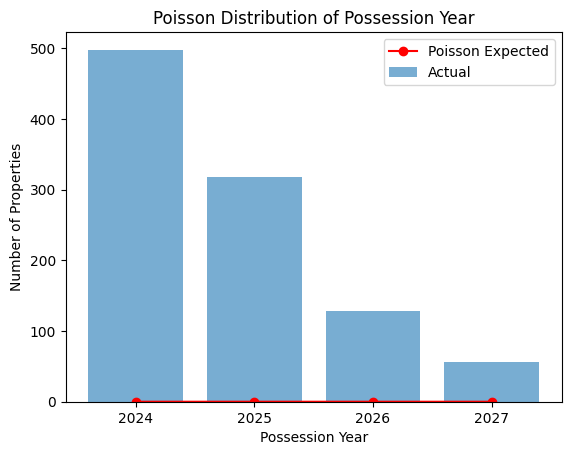

In [ ]:
years = possion_year.index
counts = possion_year.values
print(f'{counts},{years}')

# Generate Poisson PMF for same years
poisson_vals = stats.poisson.pmf(k=counts, mu=lambda_poisson) * sum(counts)
# print(poisson_vals)

# Plot
plt.bar(years, counts, alpha=0.6, label="Actual", align='center')
plt.plot(years, poisson_vals, 'ro-', label="Poisson Expected")
plt.xlabel("Possession Year")
plt.ylabel("Number of Properties")
plt.title("Poisson Distribution of Possession Year")
plt.xticks(years)
# plt.xticks(ticks=years, labels=[str(year) for year in years]) #if not use align
plt.legend()
plt.show()

## Transition from Poisson Distribution to Time Series Modeling

Initially, we approached the problem of modeling the number of property possessions using a **Poisson distribution**, considering that we were dealing with discrete count data. However, after visualizing and analyzing the data, we observed a **non-random downward trend** over the years, which violates the core assumption of the Poisson distribution—**that the mean rate (λ) remains constant over time**.

Upon deeper inspection, it became clear that the property possession data exhibits **temporal dependence** and **sequential patterns** that a static probabilistic model like Poisson cannot capture effectively.

### Why Poisson Didn't Fit Well
- The count of possessions significantly declines each year.
- Poisson assumes independence and constant mean rate, which is not true in our case.
- The variance in our data was much higher than the mean, violating the equidispersion property of Poisson.

---

## Shift to Time Series Modeling

To better model the trend and make future forecasts, we transitioned to a **Time Series approach**, specifically using **Simple Exponential Smoothing (SES)**. This model is more appropriate for our data because it:
- Captures the declining trend over time.
- Allows forecasting for future years.
- Assigns more weight to recent data, making it responsive to change.

As more yearly data becomes available, this approach can be extended to more advanced models like **ARIMA** or **Facebook Prophet**, which can capture trends and seasonality with higher precision.

---

## Conclusion

The key takeaway is that **model selection must align with data behavior**. While Poisson was a reasonable starting point for count data, our possession data required a time-aware approach to model the downward trend and forecast future behavior effectively.
